In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

def sturges(data): 
    return int((1 + 3.3 * np.log10(len(data))))

df_smart_tv = pd.read_csv('dataset_smart-tv.csv', usecols = ['bytes_up','bytes_down'])
df_chromecast = pd.read_csv('dataset_chromecast.csv', usecols = ['bytes_up','bytes_down'])

df_smart_tv += 1
df_chromecast += 1

df_smart_tv = np.log10(df_smart_tv)
df_chromecast = np.log10(df_chromecast)

df_smart_tv, df_chromecast

(         bytes_up  bytes_down
 0        5.123636    6.449963
 1        5.063602    6.354955
 2        5.057023    6.363475
 3        4.987539    6.302449
 4        4.597372    5.906413
 ...           ...         ...
 4417898  0.954243    0.954243
 4417899  0.954243    0.954243
 4417900  0.954243    0.954243
 4417901  0.954243    0.954243
 4417902  0.954243    1.518514
 
 [4417903 rows x 2 columns],
          bytes_up  bytes_down
 0        3.475383    4.691848
 1        2.836916    2.517536
 2        3.652720    4.578812
 3        2.890496    2.362105
 4        3.488877    4.713136
 ...           ...         ...
 1620524  3.306425    4.637820
 1620525  3.850585    3.202216
 1620526  2.689309    4.695771
 1620527  0.000000    2.136721
 1620528  0.000000    1.986772
 
 [1620529 rows x 2 columns])

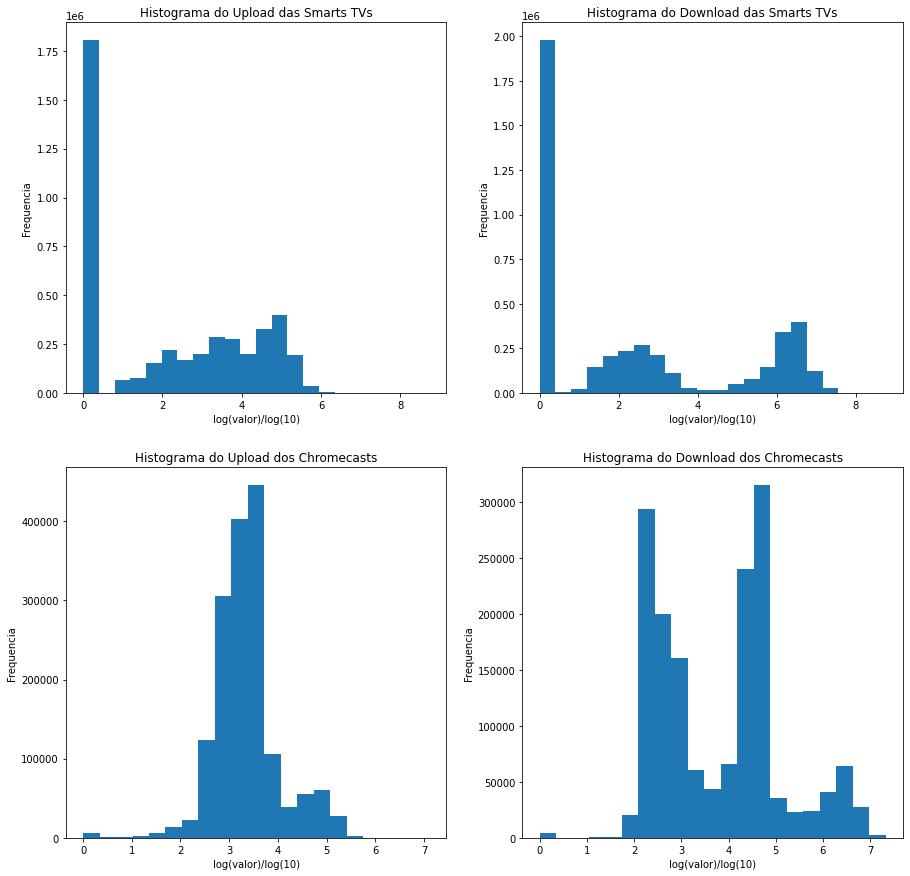

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].hist(df_smart_tv['bytes_up'], bins=sturges(df_smart_tv['bytes_up']))
ax[0][0].set_title("Histograma do Upload das Smarts TVs")
ax[0][0].set_xlabel("log(valor)/log(10)")
ax[0][0].set_ylabel("Frequencia")

ax[0][1].hist(df_smart_tv['bytes_down'], bins=sturges(df_smart_tv['bytes_down']))
ax[0][1].set_title("Histograma do Download das Smarts TVs")
ax[0][1].set_xlabel("log(valor)/log(10)")
ax[0][1].set_ylabel("Frequencia")

ax[1][0].hist(df_chromecast['bytes_up'], bins=sturges(df_chromecast['bytes_up']))
ax[1][0].set_title("Histograma do Upload dos Chromecasts")
ax[1][0].set_xlabel("log(valor)/log(10)")
ax[1][0].set_ylabel("Frequencia")

ax[1][1].hist(df_chromecast['bytes_down'], bins=sturges(df_chromecast['bytes_down']))
ax[1][1].set_title("Histograma do Download dos Chromecasts")
ax[1][1].set_xlabel("log(valor)/log(10)")
ax[1][1].set_ylabel("Frequencia")

plt.show()

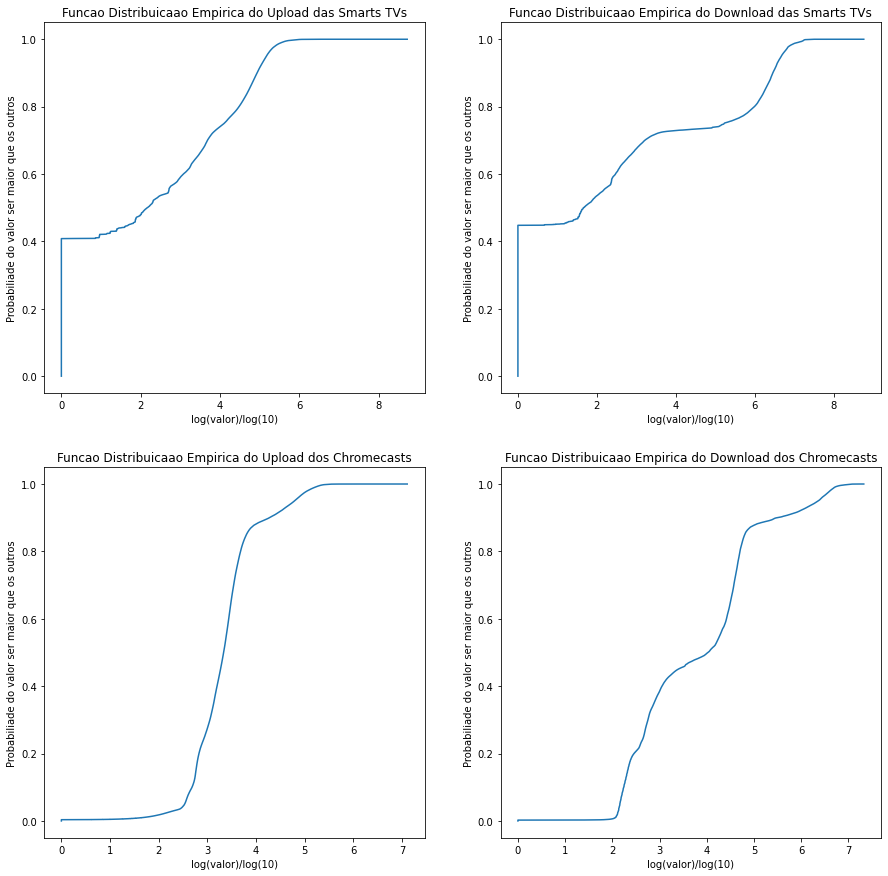

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

edf_up_smart_tv = ECDF(df_smart_tv['bytes_up'])
ax[0][0].plot(edf_up_smart_tv.x, edf_up_smart_tv.y)
ax[0][0].set_title("Funcao Distribuicaao Empirica do Upload das Smarts TVs")
ax[0][0].set_xlabel("log(valor)/log(10)")
ax[0][0].set_ylabel("Probabiliade do valor ser maior que os outros")


edf_down_smart_tv = ECDF(df_smart_tv['bytes_down'])
ax[0][1].plot(edf_down_smart_tv.x, edf_down_smart_tv.y)
ax[0][1].set_title("Funcao Distribuicaao Empirica do Download das Smarts TVs")
ax[0][1].set_xlabel("log(valor)/log(10)")
ax[0][1].set_ylabel("Probabiliade do valor ser maior que os outros")

edf_up_chromecast = ECDF(df_chromecast['bytes_up'])
ax[1][0].plot(edf_up_chromecast.x, edf_up_chromecast.y)
ax[1][0].set_title("Funcao Distribuicaao Empirica do Upload dos Chromecasts")
ax[1][0].set_xlabel("log(valor)/log(10)")
ax[1][0].set_ylabel("Probabiliade do valor ser maior que os outros")

edf_down_chromecast = ECDF(df_chromecast['bytes_down'])
ax[1][1].plot(edf_down_chromecast.x, edf_down_chromecast.y)
ax[1][1].set_title("Funcao Distribuicaao Empirica do Download dos Chromecasts")
ax[1][1].set_xlabel("log(valor)/log(10)")
ax[1][1].set_ylabel("Probabiliade do valor ser maior que os outros")

plt.show()

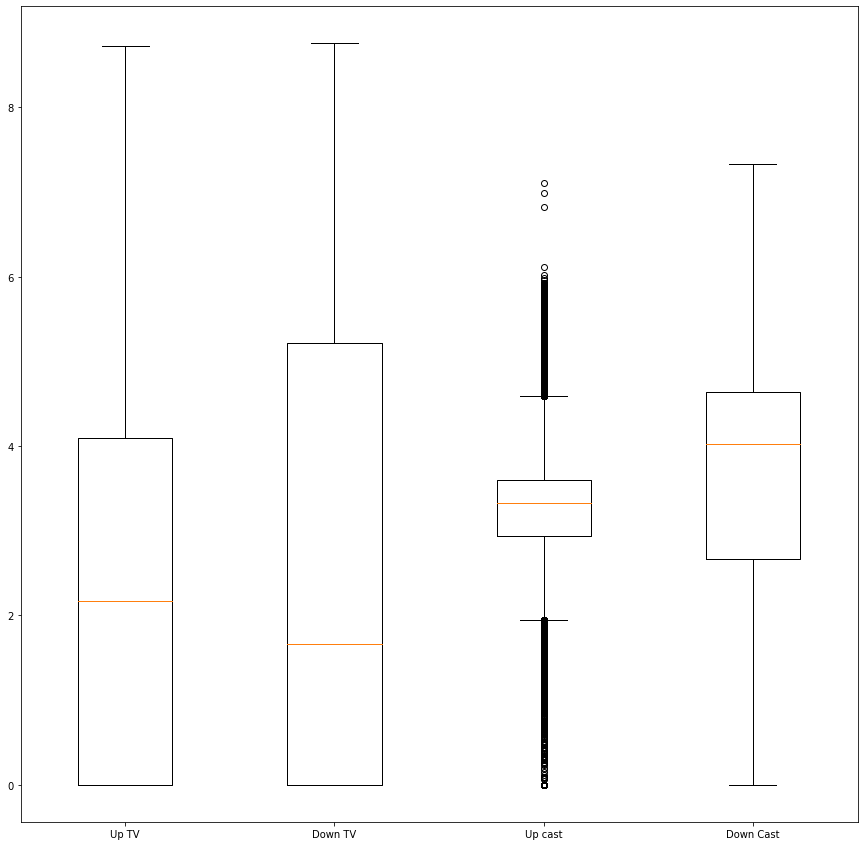

In [5]:
plt.figure(figsize=(15, 15))
plt.boxplot([df_smart_tv['bytes_up'], df_smart_tv['bytes_down'], df_chromecast['bytes_up'], df_chromecast['bytes_down']])
plt.xticks([1, 2, 3, 4], ['Up TV', 'Down TV', 'Up cast', 'Down Cast'])
plt.show()

In [6]:
mean_up_smart_tv =  np.mean(df_smart_tv['bytes_up'])
mean_down_smart_tv = np.mean(df_smart_tv['bytes_down'])
mean_up_chromecast = np.mean(df_chromecast['bytes_up'])
mean_down_chromecast = np.mean(df_chromecast['bytes_down'])

mean_up_smart_tv, mean_down_smart_tv, mean_up_chromecast, mean_down_chromecast

(2.158288206507635, 2.351678620482737, 3.3502996618084153, 3.800045706037558)

In [7]:
var_up_smart_tv =  np.var(df_smart_tv['bytes_up'])
var_down_smart_tv = np.var(df_smart_tv['bytes_down'])
var_up_chromecast = np.var(df_chromecast['bytes_up'])
var_down_chromecast = np.var(df_chromecast['bytes_down'])

var_up_smart_tv, var_down_smart_tv, var_up_chromecast, var_down_chromecast

(4.110138414147299, 6.721322376032034, 0.45996836246102296, 1.663894572605984)

In [8]:
std_up_smart_tv =  np.std(df_smart_tv['bytes_up'])
std_down_smart_tv = np.std(df_smart_tv['bytes_down'])
std_up_chromecast = np.std(df_chromecast['bytes_up'])
std_down_chromecast = np.std(df_chromecast['bytes_down'])

std_up_smart_tv, std_down_smart_tv, std_up_chromecast, std_down_chromecast

(2.0273476303158517,
 2.5925513256311885,
 0.6782096744083078,
 1.2899203745216152)